### Decision tree

In [1]:
import pyforest

In [2]:
employee=pd.read_csv('employee.csv')

<IPython.core.display.Javascript object>

In [3]:
employee.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
employee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [5]:
employee.shape

(1470, 35)

In [6]:
employee.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [7]:
employee.describe(include='object')

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,3,1,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1233,1043,961,606,882,326,673,1470,1054


In [8]:
employee.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [9]:
print('The no of people left the organization are about', round((1-1233/1470)*100),'percent of total people')

The no of people left the organization are about 16 percent of total people


In [10]:
employee.describe(include='number')

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [11]:
employee.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [12]:
employee=employee.drop(['EmployeeCount','EmployeeNumber','Over18','StandardHours'],axis=1)

In [13]:
employee.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [14]:
employee.loc[employee['Attrition']== 'No','Attrition']=0

In [15]:
employee.loc[employee['Attrition']== 'Yes','Attrition']=1

In [16]:
employee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EnvironmentSatisfaction   1470 non-null   int64 
 9   Gender                    1470 non-null   object
 10  HourlyRate                1470 non-null   int64 
 11  JobInvolvement            1470 non-null   int64 
 12  JobLevel                  1470 non-null   int64 
 13  JobRole                   1470 non-null   object
 14  JobSatisfaction         

In [17]:
employee_num=employee[employee.select_dtypes(include=[np.number]).columns.tolist()]

<IPython.core.display.Javascript object>

In [18]:
employee_num

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,2,94,3,2,4,5993,...,3,1,0,8,0,1,6,4,0,5
1,49,279,8,1,3,61,2,2,2,5130,...,4,4,1,10,3,3,10,7,1,7
2,37,1373,2,2,4,92,2,1,3,2090,...,3,2,0,7,3,3,0,0,0,0
3,33,1392,3,4,4,56,3,1,3,2909,...,3,3,0,8,3,3,8,7,3,0
4,27,591,2,1,1,40,3,1,2,3468,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,3,41,4,2,4,2571,...,3,3,1,17,3,3,5,2,0,3
1466,39,613,6,1,4,42,2,3,1,9991,...,3,1,1,9,5,3,7,7,1,7
1467,27,155,4,3,2,87,4,2,2,6142,...,4,2,1,6,0,3,6,2,0,3
1468,49,1023,2,3,4,63,2,2,2,5390,...,3,4,0,17,3,2,9,6,0,8


In [19]:
employee_attr=employee[:]
employee_attr

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,Travel_Frequently,884,Research & Development,23,2,Medical,3,Male,...,3,3,1,17,3,3,5,2,0,3
1466,39,0,Travel_Rarely,613,Research & Development,6,1,Medical,4,Male,...,3,1,1,9,5,3,7,7,1,7
1467,27,0,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2,Male,...,4,2,1,6,0,3,6,2,0,3
1468,49,0,Travel_Frequently,1023,Sales,2,3,Medical,4,Male,...,3,4,0,17,3,2,9,6,0,8


In [20]:
employee_attr.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [21]:
employee.drop(['Attrition'],axis=1,inplace=True)

In [22]:
employee_dummies=pd.get_dummies(employee[employee.select_dtypes(include=['object']).columns.tolist()])

<IPython.core.display.Javascript object>

In [23]:
employee_dummies.head()

,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,0,0,1,0,0,1,0,1,0,0,...,0,0,0,1,0,0,0,1,0,1
1,0,1,0,0,1,0,0,1,0,0,...,0,0,1,0,0,0,1,0,1,0
2,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
3,0,1,0,0,1,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,1
4,0,0,1,0,1,0,0,0,0,1,...,0,0,0,0,0,0,1,0,1,0


In [24]:
employee_combined=pd.concat([employee_num,employee_dummies],axis=1)

<IPython.core.display.Javascript object>

In [25]:
employee_combined.columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'Department_Human Resources',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Human Resources', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'EducationField_Technical Degree',
       'Gender_Female', 'Gender_Male', 'JobRole_Healthcare Representative',
       'JobRole_Human Resou

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
train_x=employee_combined

In [28]:
employee_attr.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [29]:
train_y=employee_attr['Attrition']

In [30]:
X_train,X_test,y_train,y_test=train_test_split(train_x,train_y,test_size=0.3,random_state=123)

In [31]:
X_train[0:2]

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
553,40,804,2,1,4,86,2,1,4,2342,...,0,0,1,0,0,0,0,1,0,1
758,59,1089,1,2,2,66,3,3,4,11904,...,0,0,0,0,0,0,1,0,0,1


In [32]:
y_train[0:2]

553    0
758    0
Name: Attrition, dtype: object

In [33]:
from sklearn import tree

In [34]:
dt=tree.DecisionTreeClassifier() # create model object

In [35]:
y_train.isna().sum()

0

In [36]:
X_train.shape

(1029, 51)

In [37]:
y_train=y_train.astype(np.number)

<IPython.core.display.Javascript object>

In [38]:
y_train.dtype

dtype('float64')

In [39]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [40]:
y_pred=dt.predict(X_test)
y_pred

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0., 0., 1.,
       1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0.,
       0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 1.

In [41]:
y_pred[0:5]

array([1., 0., 0., 0., 0.])

In [42]:
y_pred=y_pred.astype(np.number)

<IPython.core.display.Javascript object>

<ipython-input-42-6847231512c8>:1: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  y_pred=y_pred.astype(np.number)


In [43]:
y_test=y_test.astype(np.number)

<IPython.core.display.Javascript object>

In [44]:
from sklearn import metrics

In [45]:
print('Accuracy',metrics.accuracy_score(y_test,y_pred))

Accuracy 0.8117913832199547


In [46]:
print('Accuracy',metrics.accuracy_score(y_test,y_pred))

precision 0.30303030303030304


In [47]:
print('Accuracy',metrics.accuracy_score(y_test,y_pred))

Recall 0.3508771929824561


In [48]:
employee_attr.Attrition.value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

In [49]:
#!pip install graphviz

In [50]:
#!pip install pydotplus
!pip install graphviz

In [51]:
!pip install pydotplus

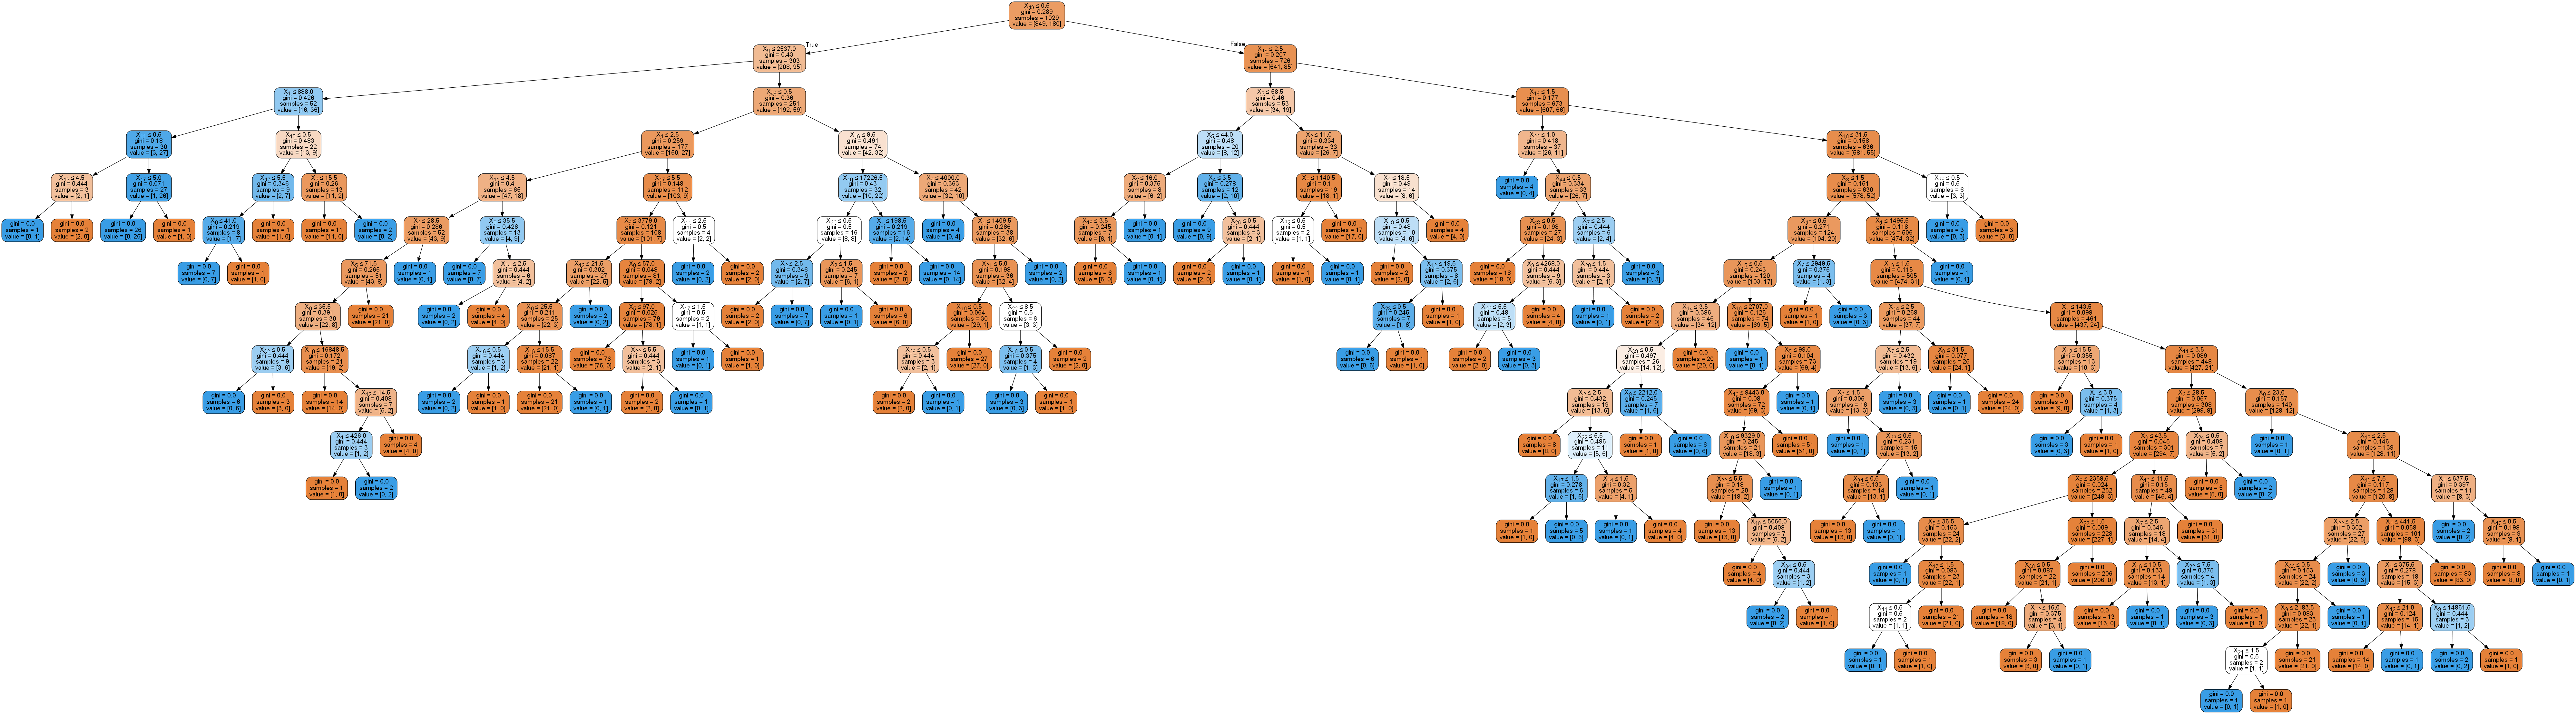

In [52]:
#plotting tree
import graphviz
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
dot_data=StringIO()
export_graphviz(dt,out_file=dot_data,
               filled=True,rounded=True,
               special_characters=True)
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
graphviz.Source(graph)
Image(graph.create_png())

## Hyperparameter tuning

In [53]:
from time import time
from scipy.stats import randint as sp_randint
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [54]:
# create function to genearte model report
def report(results,n_top=3):
    for i in range(1,n_top+1):
        candidates=np.flatnonzero(results['rank_test_score']==i)
        for candidate in candidates:
            print('Model with rank: {0}'.format(i))
            print('Mean validation score: {0: .3f} (std: {1:.3f})'.format(results['mean_test_score'][candidate],
                                                                         results['std_test_score'][candidate]))
            print('parameters: {0}'.format(results['params'][candidate]))
            print('')

In [55]:
# specify parameters and distribution to sample from
param_dist={'max_depth':[3,None],        # 3,4,5,None
           'max_features': sp_randint(1,11), 
           'min_samples_split':sp_randint(2,11), # randomly select sample value
           'criterion':['gini','entropy']}  # min sampleslef, max_leaf_nodes

In [56]:
# run randomized search

n_iter_search=20
random_search=RandomizedSearchCV(dt,param_distributions=param_dist,n_iter=n_iter_search,cv=5)

In [63]:
random_search.cv_results_

{'mean_fit_time': array([0.00560656, 0.00598812, 0.0050282 , 0.00337253, 0.00359888,
        0.        , 0.00391464, 0.00202446, 0.        , 0.00254717,
        0.00339479, 0.00369654, 0.00434594, 0.00541234, 0.00323539,
        0.00362844, 0.00647521, 0.00341535, 0.0023735 , 0.00170918]),
 'std_fit_time': array([0.00396673, 0.00379511, 0.00455943, 0.00331484, 0.00343472,
        0.        , 0.00332647, 0.0024795 , 0.        , 0.00375986,
        0.00416373, 0.00456283, 0.00532378, 0.0044508 , 0.00396295,
        0.00186549, 0.00545137, 0.00419711, 0.00343233, 0.00341835]),
 'mean_score_time': array([0.00260253, 0.        , 0.        , 0.00159988, 0.00020227,
        0.00460896, 0.00105362, 0.00303659, 0.00192771, 0.00161548,
        0.00050659, 0.00182171, 0.        , 0.        , 0.00267754,
        0.00225291, 0.00105658, 0.00264759, 0.00338306, 0.00194139]),
 'std_score_time': array([0.00332459, 0.        , 0.        , 0.00319977, 0.00040455,
        0.00268633, 0.00210724, 0.002479

In [58]:
start=time()
random_search.fit(X_train,y_train)
print('Randomized search too %.2f seconds for %d candidates' 'parameter settings.'%((time()-start),n_iter_search))
report(random_search.cv_results_)

Randomized search too 0.57 seconds for 20 candidatesparameter settings.


<IPython.core.display.Javascript object>

Model with rank: 1
Mean validation score:  0.829 (std: 0.024)
parameters: {'criterion': 'entropy', 'max_depth': 3, 'max_features': 8, 'min_samples_split': 8}



<IPython.core.display.Javascript object>

Model with rank: 2
Mean validation score:  0.829 (std: 0.008)
parameters: {'criterion': 'gini', 'max_depth': 3, 'max_features': 2, 'min_samples_split': 4}



<IPython.core.display.Javascript object>

Model with rank: 3
Mean validation score:  0.826 (std: 0.009)
parameters: {'criterion': 'gini', 'max_depth': 3, 'max_features': 6, 'min_samples_split': 10}



In [59]:
# us efull grid of mentioned parameter
param_grid={'max_depth':[3,None],        # 3,4,5,None
           'max_features': [1,3,10], 
           'min_samples_split':[2,3,10], # randomly select sample value
           'criterion':['gini','entropy']}  # min sampleslef, max_leaf_nodes

In [60]:
# run grid serach
grid_search=GridSearchCV(dt,param_grid=param_grid,cv=5)

In [61]:
start=time()
grid_search.fit(X_train,y_train)
print('gridsearchCV search too %.2f seconds for %d candidates' 'parameter settings.'%((time()-start),len(grid_search.cv_results_['params'])))
report(random_search.cv_results_)

gridsearchCV search too 0.94 seconds for 36 candidatesparameter settings.


<IPython.core.display.Javascript object>

Model with rank: 1
Mean validation score:  0.829 (std: 0.024)
parameters: {'criterion': 'entropy', 'max_depth': 3, 'max_features': 8, 'min_samples_split': 8}



<IPython.core.display.Javascript object>

Model with rank: 2
Mean validation score:  0.829 (std: 0.008)
parameters: {'criterion': 'gini', 'max_depth': 3, 'max_features': 2, 'min_samples_split': 4}



<IPython.core.display.Javascript object>

Model with rank: 3
Mean validation score:  0.826 (std: 0.009)
parameters: {'criterion': 'gini', 'max_depth': 3, 'max_features': 6, 'min_samples_split': 10}



In [62]:
Parameters:{'criterion':'gini','max_depth':3,'max_features':3,'min_samples_split':8}

In [64]:
dt_grid_search=tree.DecisionTreeClassifier(criterion='gini',max_depth=3,max_features=3,min_samples_split=8)

In [65]:
dt_grid_search.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, max_features=3, min_samples_split=8)

In [66]:
y_pred_gs=dt_grid_search.predict(X_test)

In [67]:
print('Accuracy',metrics.accuracy_score(y_test,y_pred_gs))
print('Precision',metrics.precision_score(y_test,y_pred_gs))
print('Recall',metrics.recall_score(y_test,y_pred_gs))

Accuracy 0.8798185941043084
Precision 1.0
Recall 0.07017543859649122


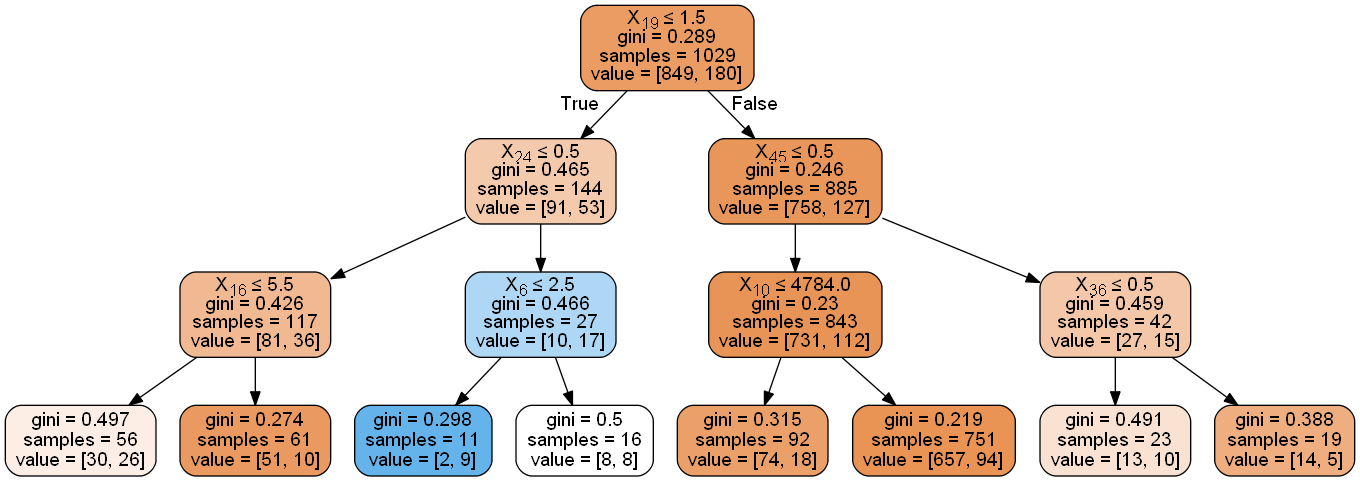

In [68]:

#plotting tree
import graphviz
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
dot_data=StringIO()
export_graphviz(dt_grid_search,out_file=dot_data,
               filled=True,rounded=True,
               special_characters=True)
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
graphviz.Source(graph)
Image(graph.create_png())


In [70]:
from sklearn.ensemble import RandomForestClassifier

In [71]:
rf = RandomForestClassifier()

In [72]:
rf.fit(X_train, y_train)

RandomForestClassifier()

In [85]:
ypred = rf.predict(X_test)

In [86]:
print(ypred.shape)
print(ypred[0:5])

(441,)
[1. 0. 0. 0. 0.]


In [87]:
rf.feature_importances_

array([0.05975219, 0.05136498, 0.04116432, 0.01838013, 0.02898388,
       0.04277891, 0.0273397 , 0.0203521 , 0.02751783, 0.06919408,
       0.04756108, 0.02886608, 0.03265793, 0.00409567, 0.02280856,
       0.02195245, 0.05335098, 0.02619057, 0.02558069, 0.03830978,
       0.02733995, 0.02360816, 0.02900303, 0.00367724, 0.01325193,
       0.00908914, 0.00251545, 0.00798159, 0.00697813, 0.00295146,
       0.00872664, 0.00753998, 0.00786375, 0.00329368, 0.00790985,
       0.00883375, 0.00706786, 0.00343422, 0.00307587, 0.00941641,
       0.00151497, 0.00331315, 0.00052768, 0.00671129, 0.00481443,
       0.00794404, 0.00617796, 0.00892489, 0.0163522 , 0.0334538 ,
       0.0285056 ])

In [88]:
employee_combined.columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'Department_Human Resources',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Human Resources', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'EducationField_Technical Degree',
       'Gender_Female', 'Gender_Male', 'JobRole_Healthcare Representative',
       'JobRole_Human Resou

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<function matplotlib.pyplot.show(close=None, block=None)>

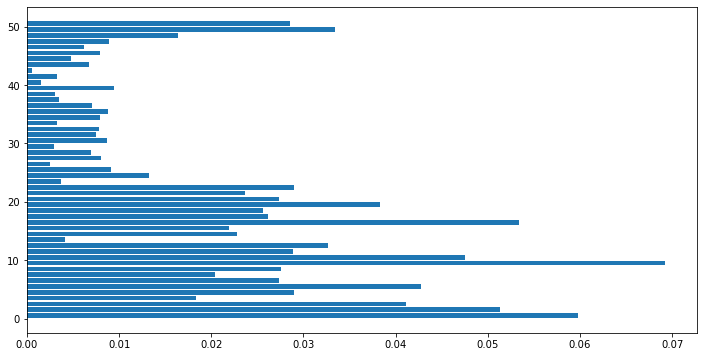

In [89]:
feature_importance = rf.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
fig = plt.figure(figsize=(12,6))
#plt.subplot(1,2,1)
plt.barh(pos, feature_importance, align='center')
#plt.yticks(pos, np.array(employee.columns))
#plt.title('Feature Importance(MDI)')

plt.show

In [90]:
employee_combined.shape

(1470, 51)

In [91]:
from sklearn import metrics

In [92]:
print('Accuracy using RF:', metrics.accuracy_score(y_test,ypred))
print('Precision using RF:', metrics.precision_score(y_test,ypred))
print('Recall using RF:', metrics.recall_score(y_test, ypred))

Accuracy using RF: 0.8956916099773242
Precision using RF: 0.8666666666666667
Recall using RF: 0.22807017543859648


In [93]:
from time import time
from scipy.stats import randint as sp_randint
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

In [115]:
# create function to genearte model report
def report(results,n_top=3):
    for i in range(1,n_top+1):
        candidates=np.flatnonzero(results['rank_test_score']==i)
        for candidate in candidates:
            print('Model with rank: {0}'.format(i))
            print('Mean validation score: {0: .3f} (std: {1:.3f})'.format(results['mean_test_score'][candidate],
                                                                         results['std_test_score'][candidate]))
            print('parameters: {0}'.format(results['params'][candidate]))
            print('')

In [116]:
param_dist={'max_depth':[3,None],        # 3,4,5,None
           'max_features': sp_randint(1,11), 
           'min_samples_split':sp_randint(2,11),
            'bootstrap': [True, False],# randomly select sample value
           'criterion':['gini','entropy']}  

In [117]:
#run randomized search
n_iter_search=20
random_search=RandomizedSearchCV(rf, param_distributions=param_dist,n_iter=n_iter_search,cv=5, scoring='recall')

In [118]:
start=time()
random_search.fit(X_train,y_train)
print('Randomized search too %.2f seconds for %d candidates' 'parameter settings.'%((time()-start),n_iter_search))
report(random_search.cv_results_)

Randomized search too 22.60 seconds for 20 candidatesparameter settings.


<IPython.core.display.Javascript object>

Model with rank: 1
Mean validation score:  0.239 (std: 0.057)
parameters: {'bootstrap': False, 'criterion': 'entropy', 'max_depth': None, 'max_features': 10, 'min_samples_split': 8}



<IPython.core.display.Javascript object>

Model with rank: 2
Mean validation score:  0.222 (std: 0.058)
parameters: {'bootstrap': False, 'criterion': 'entropy', 'max_depth': None, 'max_features': 8, 'min_samples_split': 4}



<IPython.core.display.Javascript object>

Model with rank: 3
Mean validation score:  0.211 (std: 0.052)
parameters: {'bootstrap': False, 'criterion': 'entropy', 'max_depth': None, 'max_features': 10, 'min_samples_split': 9}

Model with rank: 3
Mean validation score:  0.211 (std: 0.057)
parameters: {'bootstrap': False, 'criterion': 'entropy', 'max_depth': None, 'max_features': 8, 'min_samples_split': 9}



In [119]:
rf_grid_search= RandomForestClassifier(n_estimators=50, bootstrap=False,criterion='gini',max_features=10,min_samples_split=7)

In [120]:
#fit the model 
rf_grid_search.fit(X_train, y_train)

RandomForestClassifier(bootstrap=False, max_features=10, min_samples_split=7,
                       n_estimators=50)

In [121]:
ypred = rf_grid_search.predict(X_test)

In [122]:
print('Accuracy using Grid Search RF:', metrics.accuracy_score(y_test,ypred))
print('Precision using Grid Search RF:', metrics.precision_score(y_test,ypred))
print('Recall using Grid Search  RF:', metrics.recall_score(y_test, ypred))

Accuracy using Grid Search RF: 0.9047619047619048
Precision using Grid Search RF: 0.7777777777777778
Recall using Grid Search  RF: 0.3684210526315789


In [123]:
#Grid Search
Parameters:{ 'bootstrap': False,'criterion':'gini','max_depth':None,'max_features':10,'min_samples_split':7}
# Random Search
Parameters:{ 'bootstrap': False,'criterion':'Entropy','max_depth':None,'max_features':10,'min_samples_split':10}

In [124]:
train_y.value_counts(1)

0    0.838776
1    0.161224
Name: Attrition, dtype: float64